In [1]:
# # Overviewblack_box_mlp.train_and_eval` is a function that takes a  set of parameters and returns the accuracy of the model. We would like to MAXIMIZE the value returned. The parameters that it takes are:

#     num_neurons: int
#         Number of hidden neurons to use. Defaults to 1000.

#     gain: float
#         Variance of the initialization weight for the hidden layer weights. Defaults to 0.01

#     np_random_seed: int
#         Seed for numpy random generator used for 
        
#     **kwargs:
#         Additional arguments to send to SGDClassifier
 
# For the additional SGDClassifier  parameters, see:  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

## Basic example

In [1]:
import black_box_mlp

ImportError: No module named 'black_box_mlp'

In [3]:
%%time
accuracy = black_box_mlp.train_and_eval(np_random_seed=111, alpha = .1, random_state=2)

accuracy = black_box_mlp.train_and_eval(np_random_seed=111,alpha = .8,random_state= 2)

/home/carnd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


CPU times: user 24.7 s, sys: 712 ms, total: 25.4 s
Wall time: 15.1 s


In [4]:
print("The accuracy is:" + str(accuracy))

The accuracy is:0.891904761905


Note: you may also want to  take the time evaluated as an  additional value to minimize 

## Another example

In [5]:
%%time
accuracy = black_box_mlp.train_and_eval(num_neurons = 5e3, gain = 1e-4, alpha = 1e-3, n_iter = 10, 
                                        random_state=2, np_random_seed=111)

/home/carnd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


CPU times: user 1min 10s, sys: 1.32 s, total: 1min 11s
Wall time: 47.3 s


I think these 4 params should be  searched for:
   
   `num_neurons, gain, alpha, n_iter`
   

In [6]:
# ccuracy = black_box_mlp.train_and_eval(111, 0.1,2)
accuracy = black_box_mlp.train_and_eval(np_random_seed=111, alpha = .8, random_state=4)
print(accuracy)

/home/carnd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.89012987013


In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 21 21:43:35 2017

@author: mousse
"""

# Difference: !!! This can save plots

import numpy as np
from scipy.linalg import norm
import pandas as pd
import dogs
import scipy
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import black_box_mlp

def mpl_cost(x0):
    # var_opt = io.loadmat("allpoints/pre_opt_IC")
    # bnd1 = var_opt['lb'][0]
    # bnd2 = var_opt['ub'][0]
    # n = var_opt['n'][0, 0]
    lb = np.array([90,0.001,1])
    ub = np.array([120,1,8])

    x  = dogs.physical_bounds(x0, lb, ub)
#     print(x)
    np_random_seed1 = int(x[0][0])
    alpha1  = x[1][0]
    random_state1 = int(x[2][0])
#     accuracy = black_box_mlp.train_and_eval(np_random_seed , alpha  , random_state )
    accuracy = black_box_mlp.train_and_eval(np_random_seed = np_random_seed1, alpha  = alpha1, random_state = random_state1)    
    # save the result to a file.
    return 1-accuracy


# This script shows the Delta DOGS Adaptive K main code

# def scale_fun(yE, K0=0):
#     if K0 !=0: # not givem sacle/ range of the function
#         # K0 = 1/range
#         return yE*K0
#     else:
#         rangef = np.ptp(yE, axis=0)
#         return yE * 1/rangef

n = 3              # Dimenstion of input data
sigma0 = 0.0001       # For temporary interpolation based on alpha-dogs.
fun_arg = 8        # Type of function evaluation
plot_index = 0
iter_max = 150      # Maximum number of iterations based on each mesh
MeshSize = 1       # Represents the number of mesh refinement that algorithm will perform
num_iter = 0       # Represents how many iteration the algorithm goes
nff = 1            # Number of experiments
sc = "AdaptiveK"   # The type of continuous search function
# Calculate the Initial trinagulation points
Nm = 8             # Initial mesh grid size

# truth function
if fun_arg == 1:  # quadratic:
    fun = lambda x: 5 * norm(x - 0.3) ** 2
    y0 = 0.0  # targert value for objective function

elif fun_arg == 2:  # schewfel
    fun = lambda x: - sum(np.multiply(500 * x, np.sin(np.sqrt(abs(500 * x))))) / 250
    y0 = -1.6759 * n  # targert value for objective function

elif fun_arg == 3:  # rastinginn
    A = 3
    fun = lambda x: ( sum((x - 0.7) ** 2 - A * np.cos(2 * np.pi * (x - 0.7))) ) / 1.5

elif fun_arg == 5:  # schwefel + quadratic
    fun = lambda x: - x[0][0] / 2 * np.sin(np.abs(500*x[0][0])) + 10 * (x[1][0] - 0.92)**2
    lb = np.zeros(n)
    ub = np.ones(n)
    y0 = -0.44288
    xmin = np.array([0.89536, 0.94188])
    
elif fun_arg == 6: # Griewank function
    fun = lambda x: 1 + 1/4 * ((x[0][0]-0.67) ** 2 + (x[1][0] - 0.21) **2) - np.cos(x[0][0]) * np.cos(x[1][0]/np.sqrt(2))
    lb = np.zeros(n)
    ub = np.ones(n)
    y0 = 0.08026
    xmin = np.array([0.21875, 0.09375])
    
elif fun_arg == 7: # Shubert function
    tt = np.arange(1, 6)
    fun = lambda x: np.dot(tt, np.cos((tt + 1) * (x[0][0]-0.45) + tt)) * np.dot(tt, np.cos((tt + 1) * (x[1][0]-0.45) + tt))
    lb = np.zeros(n)
    ub = np.ones(n)
    y0 = -32.7533
    xmin = np.array([0.78125, 0.25])

elif fun_arg == 8: # Shubert function
    
    fun = lambda x: mpl_cost(x)
    lb = np.zeros(n)
    ub = np.ones(n)
    y0 = 0.03
elif fun_arg == 9: # Shubert function    
#     TODO: need new test function
    accuracy = black_box_mlp.train_and_eval(num_neurons = 5e3, gain = 1e-4, alpha = 1e-3, n_iter = 10, 
                                        random_state=2, np_random_seed=111)
    lb = np.zeros(n)
    ub = np.ones(n)
    y0 = 0.03
#     xmin = np.array([0.78125, 0.25])
    
# elif fun_arg==4:
    # funr = lambda x: np.sin(30. * (x - 0.89)**4) * np.cos(2.0 * (x - 0.89)) + (x - 0.89)/ 2.0
    # fun = lambda x, N: funr(x) + sigma0 * np.random.randn(1) + sigma0 * np.random.randn(1) + n * C0 * (1. / N) ** 3.0

xU = dogs.bounds(np.zeros([n, 1]), np.ones([n, 1]), n)
Ain = np.concatenate((np.identity(n), -np.identity(n)), axis=0)
Bin = np.concatenate((np.ones((n, 1)), np.zeros((n, 1))), axis=0)

regret = np.zeros((nff, iter_max))
estimate = np.zeros((nff, iter_max))
datalength = np.zeros((nff, iter_max))
mesh = np.zeros((nff, iter_max))

for ff in range(nff):
    if fun_arg != 4:    
        if n == 1:
            xE = np.array([[0.3, 0.5, 0.7]])
            xE = np.round(xE * Nm) / Nm  # quantize the points
        elif n == 2:
            xE = np.array([[0.875, 0.5, 0.25, 0.125, 0.75, 0.5], [0.25, 0.125, 0.875, 0.5, 0.875, 0.75]])
        else:
            xE = np.array([[0.5, 0.5, 0.5, 0.75], [0.5, 0.5, 0.75, 0.5], [0.5, 0.75, 0.5, 0.5]])
#             xE = np.random.rand(n, n + 1)
            xE = np.round(xE * Nm) / Nm
        num_ini = xE.shape[1]
        yE = np.zeros(xE.shape[1])
        T = np.zeros(xE.shape[1])
        SigmaT = np.zeros(xE.shape[1])
        
        # Calculate the function at initial points
        for ii in range(xE.shape[1]):
            xtmp = np.copy(xE[:, ii].reshape(-1,1))
            yE[ii] = fun(xtmp)
            T[ii] = 1
            SigmaT[ii] = sigma0

    inter_par = dogs.Inter_par(method="NPS")
    yE_best = np.array([])
    # sacle the function evaluations
    # K0 = 1/np.ptp(yE, axis=0) #scale the domain
    # K0 = 1/14.71
    # alpha = 1 / K0
    # alpha = 14.71

    for kk in range(MeshSize):
#        if num_iter == 15:
#            break
        for k in range(iter_max):
#            if num_iter == 15:
#                break
            #%%
            num_iter += 1
            print('Total iter = ', num_iter, 'iteration k = ', k, ' kk = ', kk)

            K0 = np.ptp(yE, axis=0)  # scale the domain
            # y0 = scale_fun(y0,K0)

            [inter_par, yp] = dogs.interpolateparameterization(xE, yE, inter_par)

#            sd = (np.amin((yp, 2 * yE - yp), 0) -y0)/sigma
            ypmin = np.amin(yp)
            ind_min = np.argmin(yp)

            # Calcuate the unevaluated function:
            yu = np.zeros([1, xU.shape[1]])
            if xU.shape[1] != 0:
                for ii in range(xU.shape[1]):
                    tmp = dogs.interpolate_val(xU[:, ii], inter_par) - np.amin(yp)
                    yu[0, ii] = tmp / dogs.mindis(xU[:, ii], xE)[0]
                
            if xU.shape[1] != 0 and np.amin(yu) < 0:
                t = np.amin(yu)
                ind = np.argmin(yu)
                xc = xU[:, ind]
                yc = -np.inf
                xU = scipy.delete(xU, ind, 1)  # create empty array
            else:
                while 1:
                    # minimize s_c
                    xs, ind_min = dogs.add_sup(xE, xU, ind_min)
                    xc, yc = dogs.tringulation_search_bound(inter_par, xs, y0, K0, ind_min)
                    yc = yc[0, 0]
                    if dogs.interpolate_val(xc, inter_par) < min(yp):
                        xc = np.round(xc * Nm) / Nm
                        break
                    else:
                        xc = np.round(xc * Nm) / Nm
                        if dogs.mindis(xc, xE)[0] < 1e-6:
                            break
                        xc, xE, xU, success, _ = dogs.points_neighbers_find(xc, xE, xU, Bin, Ain)
                        if success == 1:
                            break
                        else:
                            yu = np.hstack([yu, (dogs.interpolate_val(xc, inter_par) - y0) / dogs.mindis(xc, xE)[0]])
                if xU.shape[1] != 0:
                    if dogs.mindis(xc, xE)[0] < 1e-6:
                        tmp = 1e+20
                    else:
                        tmp = (dogs.interpolate_val(xc, inter_par) - y0) / dogs.mindis(xc, xE)[0]
                    if (np.amin(yu)) < tmp:
                        t = np.amin(yu)
                        ind = np.argmin(yu)
                        xc = xU[:, ind]
                        yc = -np.inf
                        xU = scipy.delete(xU, ind, 1)  # create empty array
                            
                    # Minimize S_d ^ k(x)
            if dogs.mindis(xc, xE)[0] < 1e-6:
                Nm *= 2 
                print('===============  MESH Refinement  ===================')

            else:
                print('xc = ', xc)
                print('yc = ', yc)
                xE = np.hstack((xE, xc.reshape(-1, 1)))
                yE = np.hstack((yE, fun(xc.reshape(-1,1))))
                T = np.hstack((T, 1))
                SigmaT = np.hstack((SigmaT, sigma0))
            
            if 1:
                yE_best = np.hstack((yE_best, min(yE)))
                p_iter = np.zeros(num_iter)
#                dogs.plot_delta_dogs(xE, yE, "Ddogs", sc, 0, fun_arg, p_iter, np.array([0, 1]), num_ini, Nm, 0, ff)
    if 1 and num_iter > 15:
        plt.figure()
        plt.title('Candidate point')
        plt.plot(np.arange(num_iter)+1, yE_best)
        plt.grid()
        plt.savefig('plot/DimRed/' + str(ff) + '/BestCandidate' +'.png', format='png', dpi=1000) 
           #%%
#    regret[ff, k] = np.min(yr)
#    estimate[ff, k] = yE[ind_out]
#    datalength[ff, k] = np.shape(xE)[1]
#    mesh[ff, k] = Nm


/home/carnd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Total iter =  1 iteration k =  0  kk =  0
xc =  [ 1.  0.  1.]
yc =  -inf
Total iter =  2 iteration k =  1  kk =  0
xc =  [ 1.  0.  0.]
yc =  -inf
Total iter =  3 iteration k =  2  kk =  0
xc =  [ 0.  0.  0.]
yc =  -inf
Total iter =  4 iteration k =  3  kk =  0
xc =  [ 0.  0.  1.]
yc =  -inf
Total iter =  5 iteration k =  4  kk =  0
xc =  [ 0.5   0.    0.25]
yc =  -inf
Total iter =  6 iteration k =  5  kk =  0
xc =  [ 0.125  0.     0.375]
yc =  -inf
Total iter =  7 iteration k =  6  kk =  0
xc =  [ 0.5   0.    0.75]
yc =  -inf
Total iter =  8 iteration k =  7  kk =  0
xc =  [ 0.375  0.375  0.   ]
yc =  -inf
Total iter =  9 iteration k =  8  kk =  0
xc =  [ 0.  1.  1.]
yc =  -inf
Total iter =  10 iteration k =  9  kk =  0
xc =  [ 0.  1.  0.]
yc =  -inf
Total iter =  11 iteration k =  10  kk =  0
xc =  [ 1.  1.  0.]
yc =  -inf
Total iter =  12 iteration k =  11  kk =  0
xc =  [ 1.  1.  1.]
yc =  -inf
Total iter =  13 iteration k =  12  kk =  0
xc =  [ 0.    0.25  0.5 ]
yc =  -inf
Total it

KeyboardInterrupt: 

In [8]:

# for kk in range(MeshSize):
# #        if num_iter == 15:
# #            break
#         for k in range(iter_max):
# #            if num_iter == 15:
# #                break
#             #%%
#             num_iter += 1
#             print('Total iter = ', num_iter, 'iteration k = ', k, ' kk = ', kk)

#             K0 = np.ptp(yE, axis=0)  # scale the domain
#             # y0 = scale_fun(y0,K0)

#             [inter_par, yp] = dogs.interpolateparameterization(xE, yE, inter_par)

# #            sd = (np.amin((yp, 2 * yE - yp), 0) -y0)/sigma
#             ypmin = np.amin(yp)
#             ind_min = np.argmin(yp)

#             # Calcuate the unevaluated function:
#             yu = np.zeros([1, xU.shape[1]])
#             if xU.shape[1] != 0:
#                 for ii in range(xU.shape[1]):
#                     tmp = dogs.interpolate_val(xU[:, ii], inter_par) - np.amin(yp)
#                     yu[0, ii] = tmp / dogs.mindis(xU[:, ii], xE)[0]
                
#             if xU.shape[1] != 0 and np.amin(yu) < 0:
#                 t = np.amin(yu)
#                 ind = np.argmin(yu)
#                 xc = xU[:, ind]
#                 yc = -np.inf
#                 xU = scipy.delete(xU, ind, 1)  # create empty array
#             else:
#                 while 1:
#                     # minimize s_c
#                     xs, ind_min = dogs.add_sup(xE, xU, ind_min)
#                     xc, yc = dogs.tringulation_search_bound(inter_par, xs, y0, K0, ind_min)
#                     yc = yc[0, 0]
#                     if dogs.interpolate_val(xc, inter_par) < min(yp):
#                         xc = np.round(xc * Nm) / Nm
#                         break
#                     else:
#                         xc = np.round(xc * Nm) / Nm
#                         if dogs.mindis(xc, xE)[0] < 1e-6:
#                             break
#                         xc, xE, xU, success, _ = dogs.points_neighbers_find(xc, xE, xU, Bin, Ain)
#                         if success == 1:
#                             break
#                         else:
#                             yu = np.hstack([yu, (dogs.interpolate_val(xc, inter_par) - y0) / dogs.mindis(xc, xE)[0]])
#                 if xU.shape[1] != 0:
#                     if dogs.mindis(xc, xE)[0] < 1e-6:
#                         tmp = 1e+20
#                     else:
#                         tmp = (dogs.interpolate_val(xc, inter_par) - y0) / dogs.mindis(xc, xE)[0]
#                     if (np.amin(yu)) < tmp:
#                         t = np.amin(yu)
#                         ind = np.argmin(yu)
#                         xc = xU[:, ind]
#                         yc = -np.inf
#                         xU = scipy.delete(xU, ind, 1)  # create empty array
                            
#                     # Minimize S_d ^ k(x)
#             if dogs.mindis(xc, xE)[0] < 1e-6:
#                 Nm *= 2 
#                 print('===============  MESH Refinement  ===================')

#             else:
#                 print('xc = ', xc)
#                 print('yc = ', yc)
#                 xE = np.hstack((xE, xc.reshape(-1, 1)))
#                 yE = np.hstack((yE, fun(xc.reshape(-1,1))))
#                 T = np.hstack((T, 1))
#                 SigmaT = np.hstack((SigmaT, sigma0))
            
#             if 1:
#                 yE_best = np.hstack((yE_best, min(yE)))
#                 p_iter = np.zeros(num_iter)
# #                dogs.plot_delta_dogs(xE, yE, "Ddogs", sc, 0, fun_arg, p_iter, np.array([0, 1]), num_ini, Nm, 0, ff)
# #     if 1 and num_iter > 15:
# #         plt.figure()
# #         plt.title('Candidate point')
# #         plt.plot(np.arange(num_iter)+1, yE_best)
# #         plt.grid()
# #         plt.savefig('plot/DimRed/' + str(ff) + '/BestCandidate' +'.png', format='png', dpi=1000) 
# #            #%%
# #    regret[ff, k] = np.min(yr)
# #    estimate[ff, k] = yE[ind_out]
# #    datalength[ff, k] = np.shape(xE)[1]
# #    mesh[ff, k] = Nm


In [11]:
print(1-np.min(yE))
# np_random_seed=111, alpha=.1, random_state=2
lb = np.array([90,0.001,1])
ub = np.array([120,1,8])
ind = np.argmin(yE)
x1 = xE[:, ind]
x2 = dogs.physical_bounds(x1.reshape(-1,1),lb,ub)
print(x2)

0.927359307359
[[ 90.   ]
 [  0.001]
 [  1.   ]]


In [12]:
# np_random_seed=111, alpha=.1, random_state=2
lb = np.array([90,0.001,1])
ub = np.array([120,1,8])
ind = np.argmin(yE)
x1 = xE[:, ind]
x2 = dogs.physical_bounds(x1.reshape(-1,1),lb,ub)
print(x2)

[[ 90.   ]
 [  0.001]
 [  1.   ]]


In [13]:
print(1-min(yE))

0.927359307359


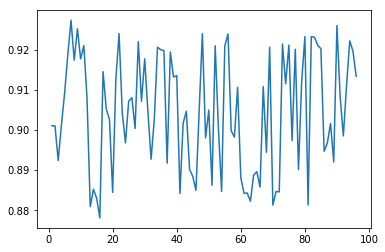

In [14]:
tt = np.linspace(1,len(yE),len(yE))
plt.plot(tt,1-yE)
plt.show()

In [15]:
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

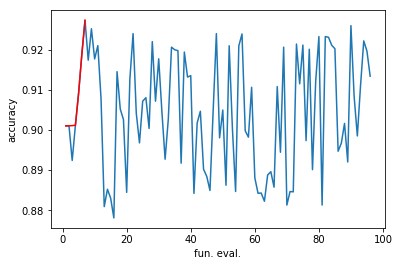

In [16]:
p_front = pareto_frontier(tt, 1-yE, maxX = False, maxY = True) 
plt.plot(tt, 1-yE)
# Then plot the Pareto frontier on top
plt.plot(p_front[0], p_front[1],'r')
plt.xlabel('fun. eval.')
plt.ylabel('accuracy')
plt.show()

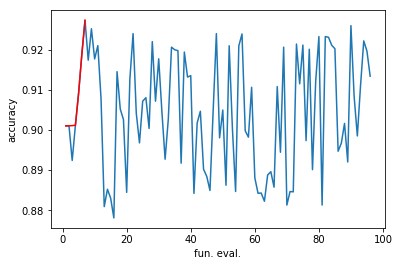

In [17]:
tt = np.linspace(1,len(yE),len(yE))
p_front = pareto_frontier(tt, 1-yE, maxX = False, maxY = True) 
plt.plot(tt, 1-yE)
# Then plot the Pareto frontier on top
plt.plot(p_front[0], p_front[1],'r')
plt.xlabel('fun. eval.')
plt.ylabel('accuracy')
plt.show()

# x0 = np.array([1,1,1]).reshape(-1,1)
# lb = np.array([90,0.001,1])
# ub = np.array([120,1,8])

# x=   dogs.normalize_bounds(x0, lb, ub)
# np_random_seed = x[0]
# alpha  = x[1]
# random_state = x[2]


In [41]:
# print(x[1][0])    
# accuracy = black_box_mlp.train_and_eval(np_random_seed = x[0], alpha  = x[1], random_state = x[2])
    

1


In [15]:
# xtmp = np.copy(xE[:, ii].reshape(-1,1))
# xE

In [49]:
# print(xE[:, ii].reshape(-1,1))

[[ 0.5]
 [ 0.5]
 [ 0.5]]


In [132]:
# def mpl_cost(x0):
#     # var_opt = io.loadmat("allpoints/pre_opt_IC")
#     # bnd1 = var_opt['lb'][0]
#     # bnd2 = var_opt['ub'][0]
#     # n = var_opt['n'][0, 0]
#     lb = np.array([90,0.001,1])
#     ub = np.array([120,1,8])

#     x  = dogs.physical_bounds(x0, lb, ub)
# #     print(x)
#     np_random_seed1 = int(x[0][0])
#     alpha1  = x[1][0]
#     random_state1 = int(x[2][0])
#     print(x)
#     print(np_random_seed)
#     print(alpha)
#     print(random_state)
# #     accuracy = black_box_mlp.train_and_eval(np_random_seed , alpha  , random_state )
    
#     accuracy = black_box_mlp.train_and_eval(np_random_seed = np_random_seed1, alpha  = alpha1, random_state = random_state1)
    
    
#     # save the result to a file.
#     return 1-accuracy


In [133]:

# x0 = xE[:, ii].reshape(-1,1)
# print(x0)
# x1 = dogs.physical_bounds(x0, lb, ub)
# print(x1)
# np_random_seed = x1[0][0]

[[ 0.5]
 [ 0.5]
 [ 0.5]]
[[ 105.    ]
 [   0.5005]
 [   4.5   ]]


In [134]:

# y = mpl_cost(x0)

[[ 105.    ]
 [   0.5005]
 [   4.5   ]]
105.0
[1]
[0]


/home/carnd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [116]:
# x = np.array([112,0.8,8])
# print(x)
# black_box_mlp.train_and_eval(np_random_seed=int(x[0]) , alpha = x[1]  , random_state=int(x[2]))

[ 112.     0.8    8. ]


/home/carnd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.88943722943722947